# Exploratory Analysis of College Majors vs Salaries

> Questions to observe
<br> 1. Do students in more popular majors earn higher salaries?
<br> 2. Do students in more female populated majors earn higher salaries?
<br> 3. Is there a relation between the number of full-time employees and median salary?
<br> 4. Unemployment rates

## 1. Project Description

> #### Data Dictionary:
**Rank** - Rank by median earnings
<br>**Major_code** - College major code
<br>**Major** - Major description
<br>**Major_category** - Category of major
<br>**Total** - Total number of people with major
<br>**Sample_size** - Sample size (unweighted) of full-time employees
<br>**Men** - Male graduates
<br>**Women** - Female graduates
<br>**ShareWomen** - Women as share of total
<br>**Employed** - Number employed
<br>**Median** - Median salary of year-round workers
<br>**Low_wage_jobs** - Number of workers in low-wage service jobs
<br>**Full_time** - Number of workers employed 35 hours or more
<br>**Part_time** - Number of workers employed less than 35 hours

## 2. Setup

In [11]:
!python3 -m pip install plotly

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import datetime
import numpy as np
import math
import scipy.stats
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
from plotly import graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline
%matplotlib inline
sns.set()

In [8]:
grads = pd.read_csv("data/recent-grads.csv")

In [9]:
grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [48]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [17]:
grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [47]:
grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

> #### Observations
>- Pandas read the "Rank" and "Major Code" as Integers, however, this should be categorical data
>- There is one null row in each of these columns "Total", "Men", "Women"

## 3. Data Cleaning

Dropping the empty rows

In [18]:
grads = grads.dropna()
grads = grads.reset_index(drop=True)
grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

## 4. Exploratory Data Visualization

### 4.1 Major Popularity vs Income

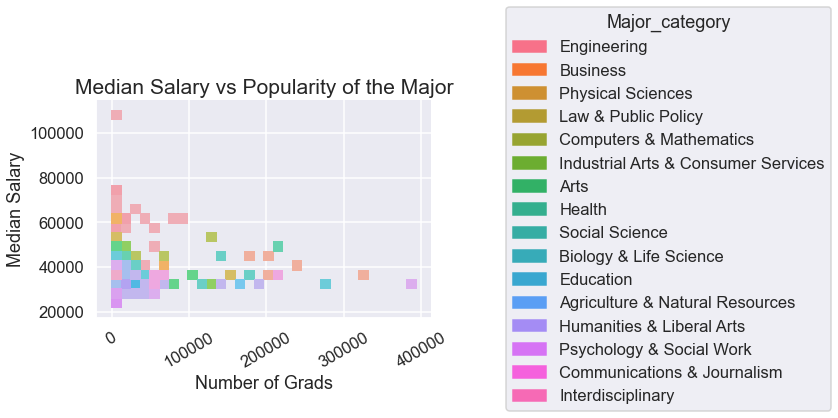

In [46]:
sns.set_style("darkgrid")
sns.set_context("talk")
ax = sns.histplot(x="Total",y="Median", data=grads, hue="Major_category")
old_legend = ax.legend_
handles = old_legend.legendHandles
labels = [t.get_text() for t in old_legend.get_texts()]
title = old_legend.get_title().get_text()
ax.legend(handles, labels, loc="center left", title=title, bbox_to_anchor=(1.2, 0.5))
plt.title("Median Salary vs Popularity of the Major", size=21)
plt.xticks(rotation=30)
plt.xlabel("Number of Grads")
plt.ylabel("Median Salary")
sns.despine()
plt.show()

> **Observations**
>- The highest income is obtained by the least popular major from the Engineering Catergory
>- Engineering majors have higher income but low popularity among students
>- The Humanities & Liberal Arts and Psychology & Social Work grads have lowest income, however, these majors are not higly popular among students as well with one outlier
>- Computers & Math majors are in the middle with regards to both popularity and yearly income

***